In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt   ##vitualition
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report




In [3]:
data=pd.read_csv('green_tech_data.csv')


In [4]:
data.head()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0


In [5]:
data.head()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   carbon_emissions    100 non-null    float64
 1   energy_output       100 non-null    float64
 2   renewability_index  100 non-null    float64
 3   cost_efficiency     100 non-null    float64
 4   sustainability      100 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.0 KB


In [8]:
data.describe(include='all')

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,214.563260,548.048551,0.517601,2.710170,0.15000
std,104.121294,263.800127,0.293426,1.320535,0.35887
min,51.932741,106.256917,0.005062,0.564771,0.00000
25%,117.620266,317.804074,0.276880,1.623267,0.00000
50%,212.449859,555.062371,0.562555,2.793732,0.00000
75%,305.571092,789.565238,0.752367,3.810999,0.00000
max,395.410428,987.085409,0.990054,4.957273,1.00000


In [9]:
print(data.isnull().sum())

carbon_emissions      0
energy_output         0
renewability_index    0
cost_efficiency       0
sustainability        0
dtype: int64


In [12]:
x=data[['carbon_emissions','energy_output','renewability_index','cost_efficiency']]
y=data['sustainability']

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)

In [14]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [15]:
y_pred=model.predict(x_test)

In [16]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

### Accuracy Score

In [18]:
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy : ",accuracy)

Accuracy :  0.95


### Confusion Matrix  

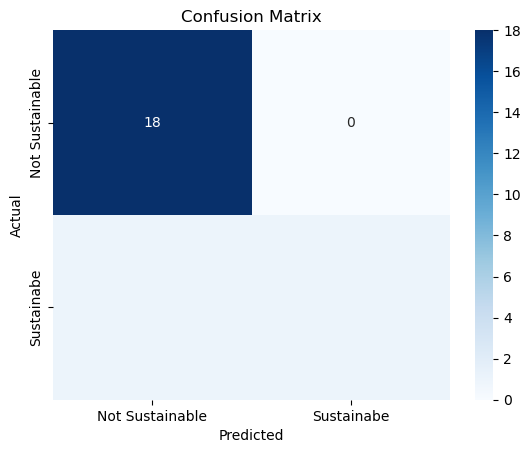

In [20]:
conf_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',xticklabels=['Not Sustainable','Sustainabe'],yticklabels=['Not Sustainable','Sustainabe'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Classification Report

In [21]:
print(classification_report(y_test,y_pred,target_names=['Not Sustainable','Sustainabe']))

                 precision    recall  f1-score   support

Not Sustainable       0.95      1.00      0.97        18
     Sustainabe       1.00      0.50      0.67         2

       accuracy                           0.95        20
      macro avg       0.97      0.75      0.82        20
   weighted avg       0.95      0.95      0.94        20



In [22]:
coefficients=pd.DataFrame(model.coef_.T,index=x.columns,columns=['coefficient'])
print(coefficients)

                    coefficient
carbon_emissions      -0.025607
energy_output          0.000749
renewability_index     1.152901
cost_efficiency       -1.146824


In [23]:
import joblib
joblib.dump(model,'Irmodel_sustainablle.pkl')

['Irmodel_sustainablle.pkl']